**Step 1: Set Up the Environment**

Install required libraries

In [ ]:
pip install tensorflow matplotlib scikit-learn


Import the necessary modules

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


**Step 2: Load CIFAR-10 Dataset**

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


Normalize the images

In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Split validation data from training

In [19]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

One-hot encode labels

In [20]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


**Step 3: Define Data Augmentation**

In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()


Prepare augmented datasets

In [22]:
train_data = train_datagen.flow(x_train, y_train, batch_size=32)
val_data = val_datagen.flow(x_val, y_val, batch_size=32)

**Step 4: Transfer Learning with ResNet50**

In [23]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze the base model layers

model_resnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_resnet.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])



**Step 5: Train ResNet50 Model**

In [24]:
history_resnet = model_resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 276s 190ms/step - accuracy: 0.0983 - loss: 2.3661 - val_accuracy: 0.1010 - val_loss: 2.3027
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 267s 189ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.1010 - val_loss: 2.3028
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 264s 188ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.0974 - val_loss: 2.3026
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 343s 202ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0920 - val_loss: 2.3030
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 267s 190ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 320s 189ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.0920 - val_loss: 2.3029
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 323s 189ms/step - accuracy: 0.1024 - loss: 2.3028 - val_accuracy: 0.0974 - val_loss: 2.3027
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 320s 188ms/step - accuracy: 0.0

**Step 6: Evaluate ResNet50 Model**

In [25]:
test_loss, test_accuracy = model_resnet.evaluate(x_test, y_test, verbose=0)
print(f"ResNet50 Test Accuracy: {test_accuracy:.2f}")


ResNet50 Test Accuracy: 0.10


**Step 7: Transfer Learning with VGG16**

In [26]:
base_model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model_vgg.trainable = False  # Freeze the base model layers

model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_vgg.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


Train VGG16 Model

In [27]:
history_vgg = model_vgg.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 677s 480ms/step - accuracy: 0.3383 - loss: 1.8487 - val_accuracy: 0.5298 - val_loss: 1.3696
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 676s 480ms/step - accuracy: 0.4488 - loss: 1.5567 - val_accuracy: 0.5248 - val_loss: 1.3411
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 671s 477ms/step - accuracy: 0.4719 - loss: 1.5041 - val_accuracy: 0.5472 - val_loss: 1.2870
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 672s 478ms/step - accuracy: 0.4781 - loss: 1.4748 - val_accuracy: 0.5472 - val_loss: 1.2660
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 703s 493ms/step - accuracy: 0.4769 - loss: 1.4701 - val_accuracy: 0.5610 - val_loss: 1.2486
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 720s 477ms/step - accuracy: 0.4877 - loss: 1.4535 - val_accuracy: 0.5654 - val_loss: 1.2420
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 682s 477ms/step - accuracy: 0.4884 - loss: 1.4435 - val_accuracy: 0.5694 - val_loss: 1.2371
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 676s 481ms/step - ac

Evaluate VGG16 Model

In [28]:

test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(x_test, y_test, verbose=0)
print(f"VGG16 Test Accuracy: {test_accuracy_vgg:.2f}")

VGG16 Test Accuracy: 0.56


**Step 8: Visualize Results**

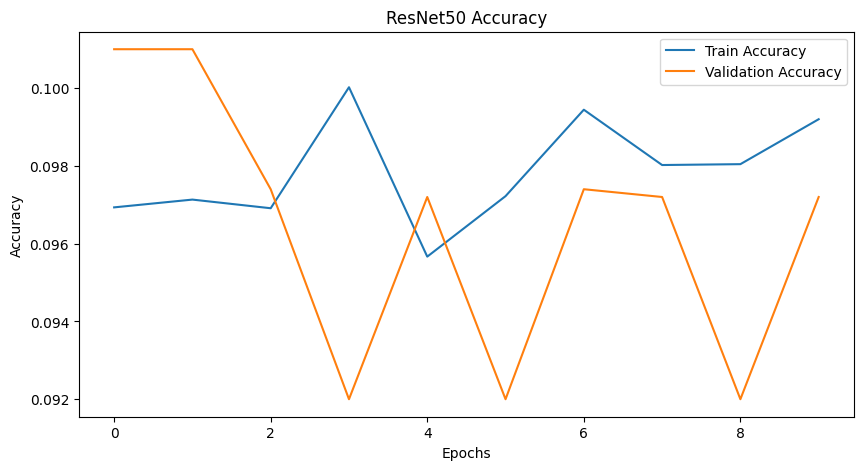

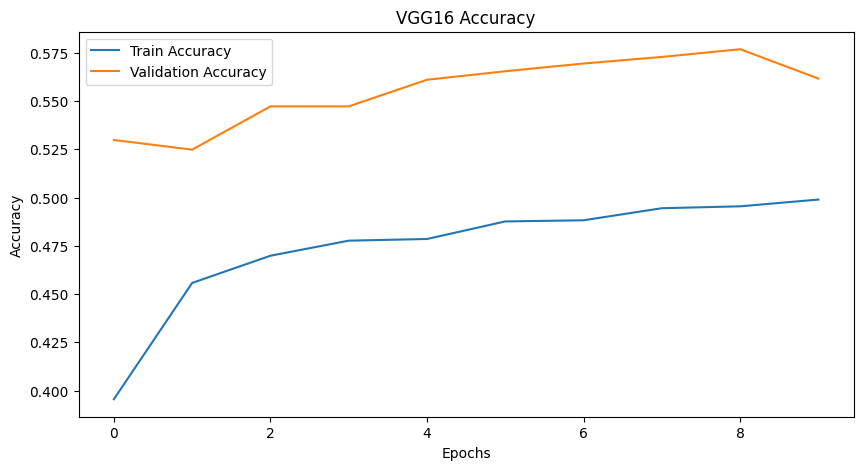

In [29]:
def plot_history(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_resnet, "ResNet50 Accuracy")
plot_history(history_vgg, "VGG16 Accuracy")

**Step 9: Classification Report**

In [30]:
y_pred_resnet = model_resnet.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
print("ResNet50 Classification Report")
print(classification_report(y_true, y_pred_resnet))

y_pred_vgg = model_vgg.predict(x_test).argmax(axis=1)
print("VGG16 Classification Report")
print(classification_report(y_true, y_pred_vgg))

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 149ms/step
ResNet50 Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step
VGG16 Classification Report
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1000
           1       0.57      0.67      0.61      1000
           2       0.63      0.35      0.45      1000
           3       0.47      0.26      0.34      1000
           4       0.68      0.34      0.46      1000
           5       0.54      0.55      0.54      1000
           6       0.41      0.85      0.55      1000
           7       0.65      0.63      0.64      1000
           8       0.73      0.65      0.69      1000
           9       0.52      0.65      0.58      1000

    accuracy                           0.56     10000
   macro avg       0.59      0.56      0.55     10000
weighted avg       0.59      0.56      0.55     10000

